In [1]:
cd ..

/Users/dorislee/Desktop/Research/datasci-api


In [2]:
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2
from dataset.Dataset import Dataset
from dataObj.DataObj import DataObj
from dataObj.Row import Row
from dataObj.Column import Column

In [7]:
dataset = Dataset("data/cars.csv")

In [10]:
measures = dataset.dataModel["measure"]

In [11]:
dataset.df.columns

Index(['Name', 'MilesPerGal', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight', 'Acceleration', 'Year', 'Origin', 'Brand'],
      dtype='object')

In [114]:
# Specified Viz Example
# Note that the compiler will expand the spec with dataModel and dataType information automatically 
# Test Example Scatterplot
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
# Column("Weight",dataModel="measure",channel='y')])
# Test Example Histogram
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x')])
# Test Example Bar Chart
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
# Column("Origin",dataModel="dimension",channel='y')])
# Test Example Line Chart
dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
Column("Year",dataModel="dimension",dataType="date",channel='y')])

In [115]:
# viz.display()

In [116]:
# def display(dobj,renderer=Altair)

In [117]:
Ndim = 0 
Nmsr = 0 
for spec in dobj.spec: 
    if (spec.dataModel == "dimension"):
        Ndim +=1
    elif (spec.dataModel == "measure"):
        Nmsr +=1

In [118]:
from vizLib.altair.BarChart import BarChart
from vizLib.altair.ScatterChart import ScatterChart
from vizLib.altair.Histogram import Histogram
from vizLib.altair.LineChart import LineChart

In [119]:
countCol = Column("Count")

In [120]:
# possibly implement chart alternatives as a list of possible encodings
if (Ndim == 0 and Nmsr ==1):
    # Histogram with Count on the y axis
    chart = Histogram(dobj)
elif (Ndim ==2 and Nmsr==0):
    pass
elif (Ndim ==0 and Nmsr==2):
    # Scatterplot
    chart = ScatterChart(dobj)
elif (Ndim ==1 and Nmsr ==2):
    # Scatterplot broken down by the dimension
    pass 
elif (Ndim ==1 and (Nmsr ==0 or Nmsr==1)):
    # Bar Chart
    if (Nmsr==0): dobj.spec.append(countCol)
    dimension = list(filter(lambda x: x.dataModel=="dimension" if hasattr(x,"dataModel") else False,dobj.spec))[0]
    dimType = dimension.dataType
    if (dimType =="date" or dimType == "oridinal"):
        chart = LineChart(dobj)
    else: # unordered categorical
        chart = BarChart(dobj)
        # TODO: if cardinality large than 6 then sort bars
elif (Ndim ==2 and Nmsr==1):
    # Bar/Line chart broken down by dimension
    pass
elif (Ndim==3):
    pass
else:
    pass

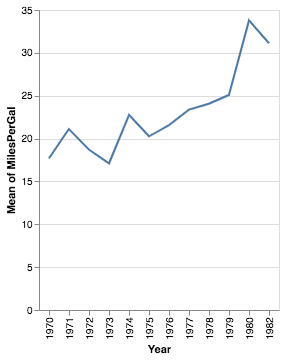

In [121]:
chart.chart